In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'Previous Exam Score': np.random.randint(0, 101, 100),
    'Study Hours': np.random.uniform(0, 10, 100),
    'Class Attendance': np.random.uniform(0, 100, 100),
    'Pass/Fail': np.random.choice([0, 1], 100)
}

df = pd.DataFrame(data)
df.to_csv("student_exam_data.csv", index=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [6]:

df = pd.read_csv("student_exam_data.csv")
print(df.head())
print(df.info())

   Previous Exam Score  Study Hours  Class Attendance  Pass/Fail
0                   51     5.867512         39.882444          0
1                   92     9.652553         81.643187          0
2                   14     6.070342         79.834512          1
3                   71     2.759992         15.071754          1
4                   60     2.962735         50.819878          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous Exam Score  100 non-null    int64  
 1   Study Hours          100 non-null    float64
 2   Class Attendance     100 non-null    float64
 3   Pass/Fail            100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None


In [4]:
target_column = 'Pass/Fail'

In [5]:
X = df.drop(target_column, axis=1)
y = df[target_column]

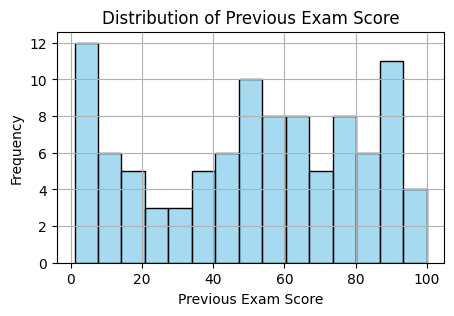

In [7]:
plt.figure(figsize=(5, 3))
sns.histplot(X['Previous Exam Score'], kde=False, color='skyblue', bins=15)
plt.title('Distribution of Previous Exam Score')
plt.xlabel('Previous Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

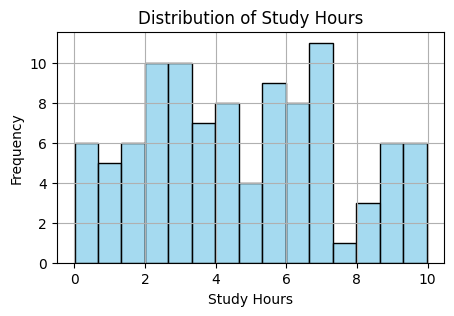

In [8]:
plt.figure(figsize=(5, 3))
sns.histplot(X['Study Hours'], kde=False, color='skyblue', bins=15)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

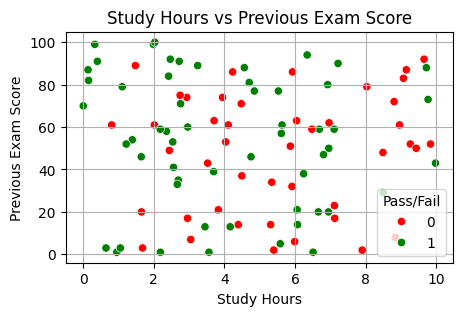

In [9]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=X, x='Study Hours', y='Previous Exam Score', hue=y,
                palette={0: 'red', 1: 'green'})
plt.title('Study Hours vs Previous Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.grid(True)
plt.show()

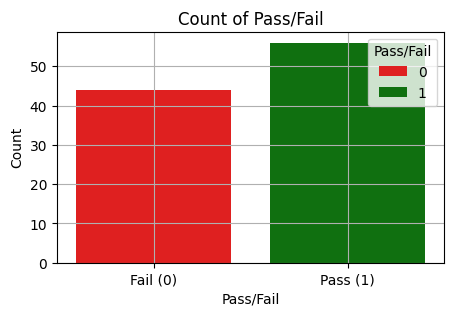

In [10]:
plt.figure(figsize=(5, 3))
sns.countplot(x=y, hue=y, palette={0: 'red', 1: 'green'})
plt.title('Count of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

In [11]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


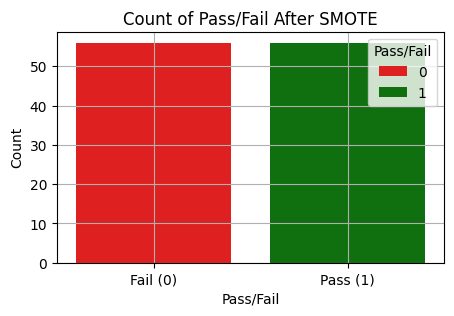

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(x=y, hue=y, palette={0: 'red', 1: 'green'})
plt.title('Count of Pass/Fail After SMOTE')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

In [13]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X = pd.DataFrame(X_standardized, columns=X.columns)
print(X.head())

   Previous Exam Score  Study Hours  Class Attendance
0             0.031640     0.379840         -0.558984
1             1.428674     1.806652          0.924308
2            -1.229098     0.456299          0.860066
3             0.713120    -0.791574         -1.440231
4             0.338306    -0.715148         -0.170500


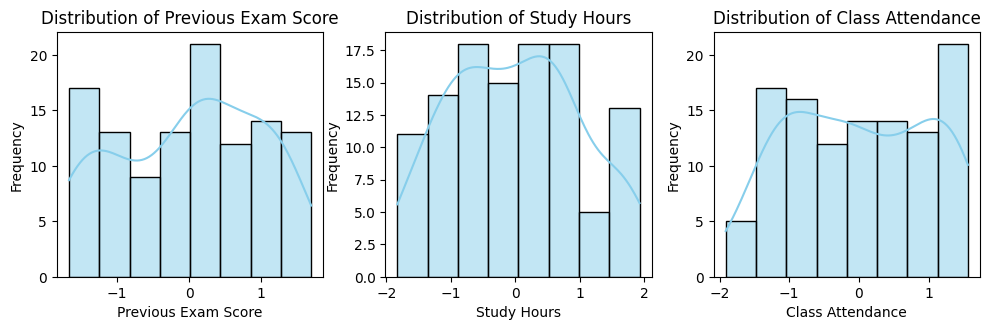

In [14]:
num_cols = X.shape[1]
plt.figure(figsize=(10, 3 * (num_cols // 3 + 1)))
for i, col in enumerate(X.columns):
    plt.subplot((num_cols // 3 + 1), 3, i + 1)
    sns.histplot(X[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

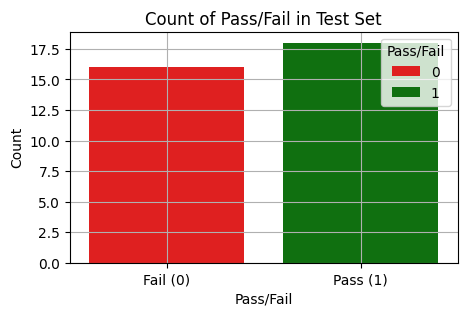

In [16]:
plt.figure(figsize=(5, 3))
sns.countplot(x=y_test, hue=y_test, palette={0: 'red', 1: 'green'})
plt.title('Count of Pass/Fail in Test Set')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

In [17]:
svc = SVC()
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
results = {}

In [18]:
classifiers = {
    'Support Vector Classifier': svc,
    'Decision Tree': decision_tree,
    'Logistic Regression': logistic_regression,
    'Naive Bayes': naive_bayes
}

In [19]:
plt.figure(figsize=(7, 5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

In [20]:
for i, (name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)

Text(321.26767676767673, 0.5, 'True Label')

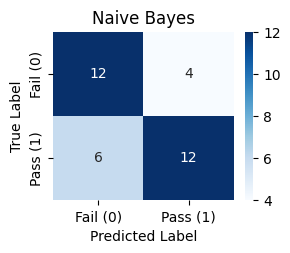

In [26]:
plt.subplot(2, 2, i)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail (0)', 'Pass (1)'],
                yticklabels=['Fail (0)', 'Pass (1)'])
plt.title(name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

In [30]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [32]:
results_df = pd.DataFrame(results).T
print(results_df)

             Accuracy  Precision    Recall
Naive Bayes  0.705882   0.710784  0.705882
